In [43]:
# Import Data Analysis Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# Load in the data
df = pd.read_csv("../input/street-data/street.csv")

In [45]:
df.head()

,postcode,estate_agent_company,estate_agent_branch,original_price,current_price,beds,status,original_instructed_date,exchange_date,ons_england_region_name
0,DN5 7RS,Robinson Hornsby,"Robinson Hornsby , Doncaster",215000,215000,NaN,Withdrawn,2019-07-01,NaN,Yorkshire and The Humber
1,RG27 0PA,McCarthy Holden,"McCarthy Holden, Hartley Wintney",925000,875000,NaN,Withdrawn,2019-07-01,NaN,South East
2,YO25 9JG,Quick & Clarke,"Quick & Clarke, Beverley",525000,525000,NaN,Withdrawn,2019-07-01,NaN,Yorkshire and The Humber
3,SO32 3PB,Byrne Runciman,"Byrne Runciman , Wickham",895000,895000,NaN,Exchanged,2019-07-01,2020-06-21,South East
4,NN18 8GU,Howe Residential,"Howe Residential, Corby",229950,229950,NaN,Withdrawn,2019-07-01,NaN,East Midlands


In [46]:
df.tail()

,postcode,estate_agent_company,estate_agent_branch,original_price,current_price,beds,status,original_instructed_date,exchange_date,ons_england_region_name
4355053,EX18 7EE,Jackson-Stops,"Jackson-Stops, Barnstaple",1350000,1350000,6.0,For Sale,2022-06-30,NaN,South West
4355054,PO36 9EQ,Hose Rhodes Dickson,"Hose Rhodes Dickson, Shanklin",560000,549950,4.0,For Sale,2022-06-30,NaN,South East
4355055,RG24 7NJ,Brockenhurst Estate Agents,"Brockenhurst Estate Agents, Whitchurch",90000,90000,2.0,For Sale,2022-06-30,NaN,South East
4355056,S81 8EQ,Horton Knights,"Horton Knights, Doncaster",270000,270000,3.0,For Sale,2022-06-30,NaN,East Midlands
4355057,SS3 8TX,Gilbert & Rose,"Gilbert & Rose, Leigh-on-sea",350000,350000,3.0,Sold STC,2022-06-30,NaN,East of England


In [47]:
df.shape

(4355058, 10)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4355058 entries, 0 to 4355057
Data columns (total 10 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   postcode                  object 
 1   estate_agent_company      object 
 2   estate_agent_branch       object 
 3   original_price            int64  
 4   current_price             int64  
 5   beds                      float64
 6   status                    object 
 7   original_instructed_date  object 
 8   exchange_date             object 
 9   ons_england_region_name   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 332.3+ MB


In [49]:
sum_na = df.isnull().sum()

In [50]:
# Ratio of missing values
sum_na/df.shape[0]

postcode                    0.000000
estate_agent_company        0.000000
estate_agent_branch         0.000000
original_price              0.000000
current_price               0.000000
beds                        0.080947
status                      0.000000
original_instructed_date    0.000000
exchange_date               0.517400
ons_england_region_name     0.000000
dtype: float64

exchange date has over half of the data missing. Was the data never recorded or it was lost.
* For purpose of analysis fill null values in beds as 0

##### A quick summary statistics of the data

In [51]:
df.describe()

,original_price,current_price,beds
count,4.355058e+06,4.355058e+06,4.002531e+06
mean,3.982377e+05,3.922821e+05,3.032417e+00
std,8.187117e+05,5.688819e+05,2.081413e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.900000e+05,1.899500e+05,2.000000e+00
50%,2.999500e+05,2.950000e+05,3.000000e+00
75%,4.500000e+05,4.500000e+05,3.000000e+00
max,7.257350e+08,4.500000e+08,3.200000e+05


Are there properties that have 0 value price?

In [52]:
# subsetting to get rows where price is 0
df[df['original_price'] == 0 ]

,postcode,estate_agent_company,estate_agent_branch,original_price,current_price,beds,status,original_instructed_date,exchange_date,ons_england_region_name
339,CM4 0BY,Beresfords,"Beresfords, at Ingatestone",0,0,NaN,Withdrawn,2019-07-01,NaN,East of England
362,NW1 6LE,Kinleigh Folkard & Hayward - Sales,"Kinleigh Folkard & Hayward - Sales, Marylebone",0,0,NaN,Exchanged,2019-07-01,2022-03-03,London
920,L16 2LA,Anwyl Homes,Anwyl Homes,0,0,NaN,Withdrawn,2019-07-01,NaN,North West
1458,M38 9RU,Plumlife,Plumlife,0,0,NaN,Withdrawn,2019-07-01,NaN,North West
1980,NE40 3PF,Purplebricks,"Purplebricks, covering the North East",0,0,NaN,Exchanged,2019-07-01,2020-10-17,North East
...,...,...,...,...,...,...,...,...,...,...
4350193,IP24 2RG,Taylor Wimpey,Taylor Wimpey,0,0,2.0,Withdrawn,2022-06-30,NaN,East of England
4352045,E15 2RD,JLL,"JLL, Stratford",0,0,3.0,For Sale,2022-06-30,NaN,London
4352273,IP24 2RG,Taylor Wimpey,Taylor Wimpey,0,0,3.0,Withdrawn,2022-06-30,NaN,East of England
4354121,IP24 2RG,Taylor Wimpey,Taylor Wimpey,0,0,4.0,Withdrawn,2022-06-30,NaN,East of England


Why do the properties have a 0 value for price?


### What are the top company with highest property volume over the years and their average volume

In [53]:
# group by estate_agent_company then aggregrate the price column by sum, mean, and standard deviation
# and finally sort by the sum
temp = df.groupby('estate_agent_company')['original_price'].agg([np.sum,np.mean,np.std]).sort_values('sum',
                                                                       ascending=False)[:10]
temp

,sum,mean,std
estate_agent_company,,,
Savills,50258245142,1.302196e+06,1.640927e+06
Purplebricks,45033414794,3.169916e+05,1.210058e+06
Knight Frank,33729331299,1.916439e+06,2.439270e+06
Foxtons,19029691800,7.191871e+05,6.529438e+05
Dexters,17884042816,7.833571e+05,7.616603e+05
Winkworth,16750659176,6.273420e+05,4.906276e+05
Connells,16454964169,2.845895e+05,1.537658e+05
Hunters,16163739288,2.995282e+05,2.285810e+05
William H. Brown,14712254806,2.431295e+05,1.412868e+05


Text(0, 0.5, 'Overall Volume')

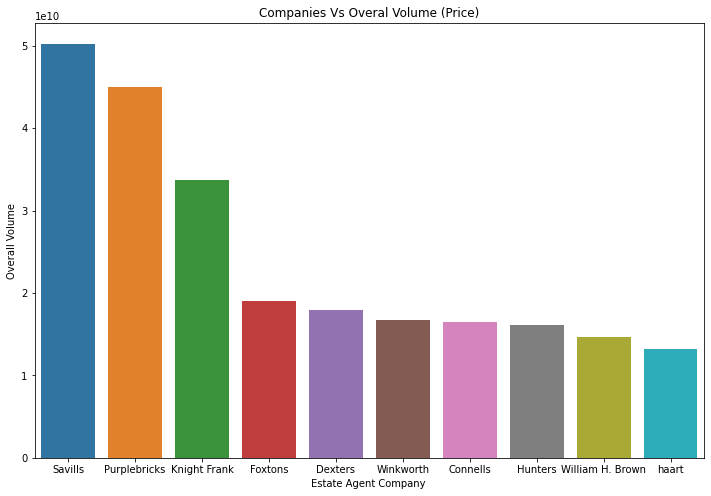

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(x=temp.index,y=temp['sum'] )
plt.title('Companies Vs Overal Volume (Price)')
plt.xlabel('Estate Agent Company ')
plt.ylabel('Overall Volume')

Savills agents has the highest price with an average property volume of 1.3M

#### The Top 10 company with lowest price

In [55]:
df.groupby('estate_agent_company').sum()[['original_price']].sort_values('original_price',
                                                                        )[:10]

,original_price
estate_agent_company,
CONLON LIVING,0
"Knight Frank, Leeds",0
Jones Lang Lasalle Exeter,0
Little Scotland Developments,0
"Avison Young, London",0
Burley Browne,0
St Osyth Priory Estates Limited,0
Harriss Property Ltd,0
Zack Williams Real Estate,0


It is suspicious to have price values as zero, further analysis could be done on that. \
_Having seen this lets check with companies that have prices above zero_


In [56]:
 #group by estate_agent_company then aggregrate the price column by sum, mean, standard deviation,
# maximum and minimum, then filter out rows that have sum above 0, sort by the sum and finally
# get the first 10
temp = df.groupby('estate_agent_company')['original_price'].agg([np.sum,np.mean,np.std,np.max,np.min])
temp[temp['sum'] > 0].sort_values('sum')[:10]

,sum,mean,std,amax,amin
estate_agent_company,,,,,
North Lincolnshire Council,1,1.0,NaN,1,1
Stellco Homes,1,1.0,NaN,1,1
Coast Estate Agents,601,601.0,NaN,601,601
Payton Jewell Caines,700,700.0,NaN,700,700
Chris Hamriding Commercial,10000,10000.0,NaN,10000,10000
James & Sons,10000,10000.0,NaN,10000,10000
Maxey Grounds  Commercial,20000,20000.0,NaN,20000,20000
Hummerstone & Hawkins,22500,22500.0,NaN,22500,22500
Broomheads Commercial,24950,24950.0,NaN,24950,24950


## Value of properties of company over the years

Lets explore each company over the past 3 years 2019 ~ 2022

In [57]:
df['year'] = df['original_instructed_date'].apply(lambda val: val.split('-')[0])

In [58]:
df['year'].unique()

array(['2019', '2020', '2021', '2022'], dtype=object)

In [59]:
# group the data  by year
by_year = df.groupby('year')

#### What are the property volume prices at each year

In [60]:
# get the group that has year to be 2019
df_2019 = by_year.get_group('2019')
df_2019.groupby('estate_agent_company')['original_price'].agg([np.sum,np.mean,np.std]).sort_values('sum',
                                                                       ascending=False)[:10]

,sum,mean,std
estate_agent_company,,,
Purplebricks,7615585131,2.889507e+05,1.866820e+05
Savills,6384181691,1.159495e+06,1.516281e+06
Knight Frank,3763356414,1.764349e+06,2.456459e+06
Foxtons,3123977523,7.457573e+05,6.910165e+05
Connells,2847388977,2.706644e+05,1.557952e+05
Hamptons International Sales,2556081689,8.847635e+05,6.504528e+05
Dexters,2516711859,8.380659e+05,1.209509e+06
William H. Brown,2406132467,2.300758e+05,1.351613e+05
Hunters,2391715351,2.738710e+05,1.941332e+05


Property volume of agent company in 2019

In [61]:
df_2020 = by_year.get_group('2020')

df_2020.groupby('estate_agent_company')['original_price'].agg([np.sum,np.mean,np.std]).sort_values('sum',
                                                                       ascending=False)[:10]

,sum,mean,std
estate_agent_company,,,
Savills,17395296542,1.298156e+06,1.559117e+06
Purplebricks,17327098094,3.161014e+05,1.953959e+05
Knight Frank,12155646803,1.833154e+06,2.438001e+06
Foxtons,7083412349,6.927543e+05,5.641431e+05
Hamptons International Sales,7030532197,9.737579e+05,7.775382e+05
Dexters,6535316488,7.785700e+05,7.279622e+05
Winkworth,6148421973,6.209273e+05,4.626907e+05
Hunters,5417054314,2.984438e+05,2.018678e+05
Connells,5342013311,2.812918e+05,1.489904e+05


Property volume of agent company in 2020

In [62]:
df_2021 = by_year.get_group('2021')
df_2021.groupby('estate_agent_company')['original_price'].agg([np.sum,np.mean,np.std]).sort_values('sum',
                                                                       ascending=False)[:10]

,sum,mean,std
estate_agent_company,,,
Savills,16558395344,1.310622e+06,1.690720e+06
Purplebricks,12956817086,3.176080e+05,2.112841e+05
Knight Frank,10803027401,1.981480e+06,2.406831e+06
Hamptons Sales,7469934556,1.030905e+06,8.235968e+05
Dexters,5935317107,7.674317e+05,6.371564e+05
Foxtons,5849231889,7.261616e+05,7.255566e+05
Connells,5449844660,2.835065e+05,1.525625e+05
Winkworth,5445399543,6.317169e+05,5.040093e+05
Kinleigh Folkard & Hayward - Sales,5212869795,7.000900e+05,4.083561e+05


Property volume of agent company in 2021

In [63]:
df_2022 = by_year.get_group('2022')
df_2022.groupby('estate_agent_company')['original_price'].agg([np.sum,np.mean,np.std]).sort_values('sum',
                                                                       ascending=False)[:10]

,sum,mean,std
estate_agent_company,,,
Savills,9920371565,1.406148e+06,1.781635e+06
Purplebricks,7133914483,3.549388e+05,3.179176e+06
Knight Frank,7007300681,2.070715e+06,2.471618e+06
Hamptons Sales,4174815788,1.068548e+06,8.460867e+05
Strike,3383161018,3.075042e+05,2.373711e+05
Hunters,3272495242,3.150265e+05,2.567804e+05
Winkworth,3215772473,6.686988e+05,5.296377e+05
Foxtons,2973070039,7.449436e+05,6.667425e+05
Fine & Country,2906635156,1.041805e+06,9.773508e+05


Property volume of agent company in 2022

In [64]:
df['status'].unique()

array(['Withdrawn', 'Exchanged', 'Sold STC', 'Completed', 'For Sale'],
      dtype=object)

### What is the volume of properties for sales over time

In [65]:
# get all rows with status of For Sale
ppty_for_sale = df[df['status'] == 'For Sale']
temp_info = ppty_for_sale.groupby('year')['original_price'].agg([np.sum, np.mean])
temp_info

,sum,mean
year,,
2019,829946669,856498.110423
2020,3275383638,714681.134192
2021,17786341892,614742.401134
2022,80123342687,562778.534161


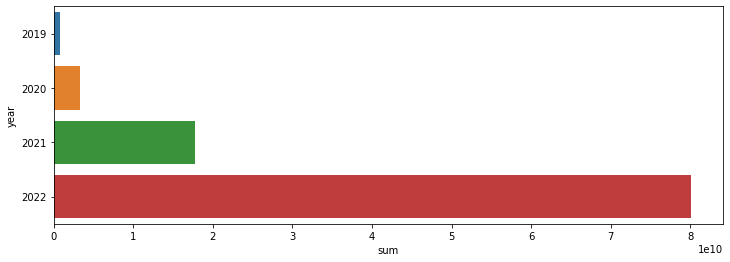

In [73]:
plt.figure(figsize=(12,4))
sns.barplot(y=temp_info.index, x=temp_info['sum'], orient = 'h', );

The volume of properties for sale has been growing significantly over the years

### What is the volume of properties for sale accross different regions

In [74]:
temp_info = ppty_for_sale.groupby('ons_england_region_name')['original_price'].agg([np.sum, np.mean,'count'])\
.sort_values('sum',ascending=False)
temp_info

,sum,mean,count
ons_england_region_name,,,
London,44538624764,1.064041e+06,41858
South East,18451504691,5.688939e+05,32434
East of England,10105235199,4.919783e+05,20540
South West,8036710267,4.747865e+05,16927
North West,6299522615,3.106273e+05,20280
West Midlands,4628068082,3.634704e+05,12733
East Midlands,4567951564,3.512188e+05,13006
Yorkshire and The Humber,3844875359,3.116287e+05,12338
North East,1542522345,2.288609e+05,6740


Properties seems to have higher prices in London at first glance.\
A look at the counts show there are more properties for sale in London than other region

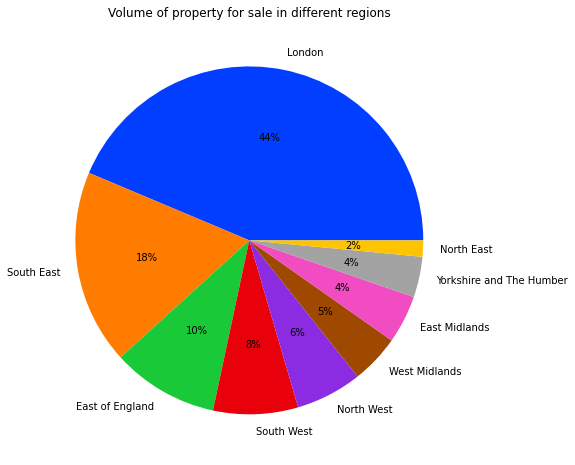

In [75]:
plt.figure(figsize=(12,8))
data = temp_info['sum']
labels = temp_info.index
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.title('Volume of property for sale in different regions')
plt.show()

#### What is the volume of properties sold over the years

Now lets look the volume of properties sold over the years

In [76]:
# get all rows with status of For Sale
ppty_sold = df[df['status'].str.contains('Sold')]
temp_info = ppty_sold.groupby('ons_england_region_name')['original_price'].agg([np.sum, np.mean,'count'])\
.sort_values('sum',ascending=False)
temp_info

,sum,mean,count
ons_england_region_name,,,
South East,36955392064,489222.680523,75539
London,31550842959,672711.519136,46901
East of England,21809518713,417526.920896,52235
South West,18106549759,390825.395735,46329
North West,11542255112,258882.025614,44585
West Midlands,9657258471,298681.176229,32333
East Midlands,8939082627,288218.043753,31015
Yorkshire and The Humber,7741262377,253156.165244,30579
North East,2916899719,192649.079915,15141


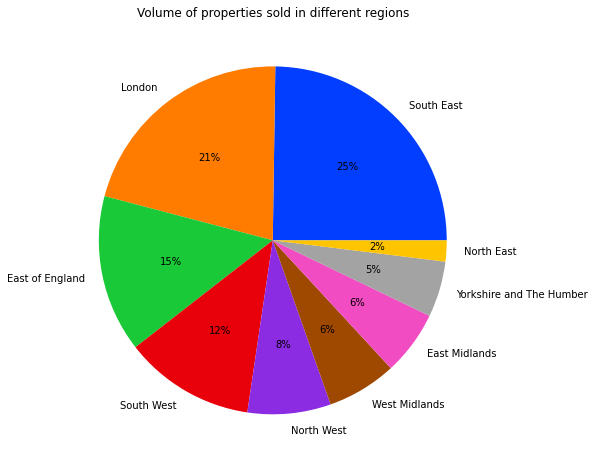

In [77]:
plt.figure(figsize=(12,8))
data = temp_info['sum']
labels = temp_info.index
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.title('Volume of properties sold in different regions')
plt.show()

There is high volume of properties sold in the south-eastern part of england

### What is the volume of properties sold in reach region over 3 years

Lets dive more to see how this volume were in the past years

In [78]:
sold_2019 = ppty_sold[ppty_sold['year']=='2019']
sold_2019.groupby('ons_england_region_name')['original_price'].agg([np.sum,np.mean,'count'])\
.sort_values('sum', ascending=False)


,sum,mean,count
ons_england_region_name,,,
London,74038645,1.028315e+06,72
South East,46626030,3.586618e+05,130
North West,26041940,3.886857e+05,67
East of England,24316825,3.331072e+05,73
South West,20510394,3.016234e+05,68
West Midlands,12296095,2.320018e+05,53
Yorkshire and The Humber,10727350,2.438034e+05,44
East Midlands,8669795,2.889932e+05,30
North East,5546744,2.133363e+05,26


Volume of properties sold in 2019

In [79]:
sold_2020 = ppty_sold[ppty_sold['year']=='2020']
sold_2020.groupby('ons_england_region_name')['original_price'].agg([np.sum,np.mean,'count'])\
.sort_values('sum', ascending=False)

,sum,mean,count
ons_england_region_name,,,
London,573458612,694259.820823,826
South East,403935005,392169.907767,1030
East of England,258760718,377202.212828,686
South West,168032162,342224.362525,491
North West,109028684,273254.847118,399
West Midlands,78194924,244359.137500,320
East Midlands,73164064,291490.294821,251
Yorkshire and The Humber,58976762,230377.976562,256
North East,25231800,197123.437500,128


Volume of properties sold in 2020

In [80]:
sold_2021 = ppty_sold[ppty_sold['year']=='2021']
sold_2021.groupby('ons_england_region_name')['original_price'].agg([np.sum,np.mean,'count'])\
.sort_values('sum', ascending=False)

,sum,mean,count
ons_england_region_name,,,
South East,7188076280,496516.977274,14477
London,7063925738,654188.343953,10798
East of England,4213615793,412978.123395,10203
South West,3013230526,376983.676467,7993
North West,1893257949,261463.602955,7241
West Midlands,1457836607,296308.253455,4920
East Midlands,1414918087,294713.202874,4801
Yorkshire and The Humber,1069597351,252740.394849,4232
North East,410959229,192126.801777,2139


Volume of properties sold in 2021

In [81]:
sold_2022 = ppty_sold[ppty_sold['year']=='2022']
sold_2022.groupby('ons_england_region_name')['original_price'].agg([np.sum,np.mean,'count'])\
.sort_values('sum', ascending=False)

,sum,mean,count
ons_england_region_name,,,
South East,29316754749,489411.952005,59902
London,23839419964,677160.061469,35205
East of England,17312825377,419470.970780,41273
South West,14904776677,394546.329169,37777
North West,9513926539,257983.798986,36878
West Midlands,8108930845,299886.495747,27040
East Midlands,7442330681,286983.020900,25933
Yorkshire and The Humber,6601960914,253463.389795,26047
North East,2475161946,192649.591065,12848


Volume of properties sold in 2022

### Which regions over the years did the agent companies have their highest volume of property sold

In [82]:

ppty_sold.groupby(['estate_agent_company','ons_england_region_name'])['original_price'].agg([np.sum,np.mean,'count'])\
.sort_values('sum', ascending=False)[:10]

,,sum,mean,count
estate_agent_company,ons_england_region_name,,,
Savills,London,1306156028,1.624572e+06,804
Kinleigh Folkard & Hayward - Sales,London,1250373288,7.028518e+05,1779
Chestertons Estate Agents,London,1120641449,1.075472e+06,1042
Winkworth,London,1026488177,7.326825e+05,1401
Savills,South East,1003799740,1.467543e+06,684
Knight Frank,London,939810944,2.155530e+06,436
Hamptons Sales,South East,824258050,9.789288e+05,842
Purplebricks,London,789847929,5.050179e+05,1564
Hamptons Sales,London,770464166,1.059786e+06,727


Obviously most agent sold properties in London

### Which regions over the years did the agent companies have their highest volume of property for sale

In [83]:

ppty_for_sale.groupby(['estate_agent_company','ons_england_region_name'])['original_price'].agg([np.sum,np.mean,'count'])\
.sort_values('sum', ascending=False)[:10]

,,sum,mean,count
estate_agent_company,ons_england_region_name,,,
Savills,London,3067673385,2.483946e+06,1235
Knight Frank,London,2623772547,3.521842e+06,745
Dexters,London,1886874017,8.005405e+05,2357
Foxtons,London,1812251190,8.211378e+05,2207
Chestertons Estate Agents,London,1099345436,1.337403e+06,822
Savills,South East,1089108135,1.707066e+06,638
Hamptons Sales,London,933383328,1.287425e+06,725
Kinleigh Folkard & Hayward - Sales,London,926974451,7.718355e+05,1201
Winkworth,London,789301275,8.423706e+05,937


In [84]:
ppty_sold.head()

,postcode,estate_agent_company,estate_agent_branch,original_price,current_price,beds,status,original_instructed_date,exchange_date,ons_england_region_name,year
416,BH23 1BW,Slades Estate Agents,"Slades Estate Agents, Christchurch",300000,275000,NaN,Sold STC,2019-07-01,NaN,South West,2019
3332,PO39 0DY,Pittis,"Pittis, Freshwater",397500,360000,NaN,Sold STC,2019-07-01,NaN,South East,2019
7055,NR27 9EF,Henleys,"Henleys, Cromer",145000,120000,2.0,Sold STC,2019-07-02,NaN,East of England,2019
7472,GL7 6BG,Escape & Discover,"Escape & Discover, Cotswolds",1200000,1200000,NaN,Sold STC,2019-07-02,NaN,South West,2019
7494,DE15 0JT,Nicholas Humphreys,"Nicholas Humphreys, Burton-on-Trent",99950,99950,2.0,Sold STC,2019-07-02,NaN,West Midlands,2019


## A zoom look by time

In [85]:
ppty_sold['original_instructed_date'] = pd.to_datetime(ppty_sold['original_instructed_date'])
ppty_sold['month'] = ppty_sold['original_instructed_date'].apply(lambda val: val.month_name())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Which month was there highest volume sold and what is the average volume sold by month

In [86]:
temp_info =  ppty_sold.groupby('month')['original_price'].agg([np.sum, np.mean, 'count'])\
.sort_values('sum', ascending=False)
temp_info

,sum,mean,count
month,,,
May,26463654350,398993.672919,66326
April,24392766500,400294.837291,60937
March,23991285792,395425.992089,60672
June,22071442413,391219.710601,56417
February,16464901120,391108.867880,42098
January,11448374975,392915.364485,29137
November,5716872079,387926.449006,14737
December,5360748132,392211.598771,13668
September,4443498131,501806.677696,8855


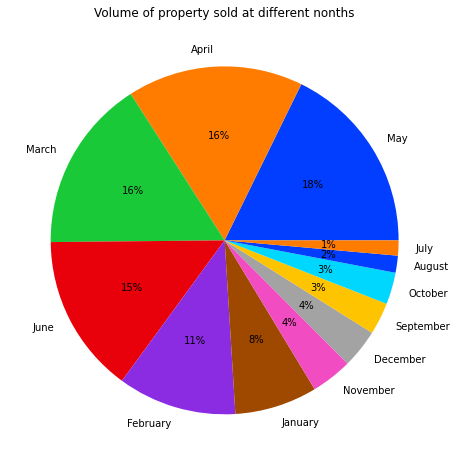

In [87]:
plt.figure(figsize=(12,8))
data = temp_info['sum']
labels = temp_info.index
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.title('Volume of property sold at different nonths')
plt.show()

### Which month during the year did this companies have their highest volume sold

In [88]:
ppty_sold.groupby(['estate_agent_company','month'])['original_price'].agg(['sum','mean','count'])\
.sort_values('sum', ascending=False)[:10]

sum          mean  count
estate_agent_company month                                    
Purplebricks         April      698710152  3.091638e+05   2260
                     May        665932499  3.083021e+05   2160
Savills              May        662193485  1.397033e+06    474
Purplebricks         March      654124288  3.053802e+05   2142
Savills              April      625935525  1.452287e+06    431
Purplebricks         June       577417403  3.002691e+05   1923
Savills              June       537294185  1.410221e+06    381
County Lettings Ltd  September  525000000  5.250000e+08      1
Savills              March      523645790  1.335831e+06    392
Purplebricks         February   494594850  3.003005e+05   1647

## What is the average volume of properties sold in each region by month

In [89]:
ppty_sold.groupby(['ons_england_region_name','month'])['original_price'].agg(['sum','mean','count'])\
.sort_values('sum', ascending=False)[:10]

sum           mean  count
ons_england_region_name month                                     
South East              May       6407197642  504305.205982  12705
                        March     5985298125  487719.860251  12272
                        April     5902601791  493941.572469  11950
                        June      5450860885  506679.762502  10758
London                  May       5068613505  695378.447661   7289
                        March     4959750668  664133.726299   7468
                        April     4902754423  705736.925723   6947
South East              February  4087110085  460001.135059   8885
London                  June      4030660860  678105.797443   5944
                        February  3693774515  662204.108103   5578